In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.insert(0, "../code-previous")
sys.path.insert(0, "..")

import IPython.core.debugger
dbg = IPython.core.debugger.Pdb()

In [3]:
import pandas as pd
import numpy as np
import nltk
stopwords = nltk.corpus.stopwords.words('english')

from sklearn.model_selection import train_test_split

from scipy import stats
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)

from unicodedata import category
from tqdm import tqdm
tqdm.pandas(desc="Progress")

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
path2rawdata = '/mnt/disks/vault/wos2017-parsed/'

In [4]:
raw_data_path = "/mnt/disks/vault/analysis-data/nature-science-data-full/nature_science_journal_data.pql"
data = pd.read_pickle(raw_data_path)

data = data[data.Journal == "NATURE"]

len(data)

153697

In [5]:
# filtering the data on which the model could be fit well
data = data[data.PubYear_x.isin([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])]
len(data)

10566

In [6]:
# what is the average number of words per year
# New fields to dataframe 
data['log_c5'] = data['c5'].progress_apply(lambda x: np.log(x+1))
data['character_count'] = data['Title'].progress_apply(lambda x: len(x))
data["word_count"] = data["Title"].progress_apply(lambda x: len(x.split()))
data['title_without_punct'] = data['Title'].progress_apply(lambda x: 
                                                           str.lower(''.join(ch for ch in str(x) if category(ch)[0] != 'P')))
data["title_without_stopwords"] = data['title_without_punct'].progress_apply(lambda x: 
                                                                            " ".join([word for word in x.split() if word not in stopwords]))


data["word_count"] = data["Title"].progress_apply(lambda x: len(x.split()))
data["cleaned_title_word_count"] = data["title_without_stopwords"].progress_apply(lambda x: len(x.split()))

Progress: 100%|██████████| 10566/10566 [00:00<00:00, 495145.59it/s]


In [7]:
def get_grouped_data_for_year(year):
    tmp = data[data.PubYear_x == year]
    tmp = tmp.groupby('word_count')['c5'].agg(['mean','count'])
    tmp = tmp.rename(columns={'mean':'avg_c5', 'count':'weight'}).reset_index()
    tmp['avg_log_c5'] = tmp['avg_c5'].apply(lambda x: np.log(x+1))
    return tmp
    
grouped_avgs = [get_grouped_data_for_year(year) for year in range(2002, 2011)]

In [8]:
x02 = list(grouped_avgs[0]["word_count"])
y02 = list(grouped_avgs[0]["avg_log_c5"])
w02 = np.array(list(grouped_avgs[0]["weight"]))

x03 = list(grouped_avgs[1]["word_count"])
y03 = list(grouped_avgs[1]["avg_log_c5"])
w03 = np.array(list(grouped_avgs[1]["weight"]))

x04 = list(grouped_avgs[2]["word_count"])
y04 = list(grouped_avgs[2]["avg_log_c5"])
w04 = np.array(list(grouped_avgs[2]["weight"]))

x05 = list(grouped_avgs[3]["word_count"])
y05 = list(grouped_avgs[3]["avg_log_c5"])
w05 = np.array(list(grouped_avgs[3]["weight"]))


x06 = list(grouped_avgs[4]["word_count"])
y06 = list(grouped_avgs[4]["avg_log_c5"])
w06 = np.array(list(grouped_avgs[4]["weight"]))


x07 = list(grouped_avgs[5]["word_count"])
y07 = list(grouped_avgs[5]["avg_log_c5"])
w07 = np.array(list(grouped_avgs[5]["weight"]))


x08 = list(grouped_avgs[6]["word_count"])
y08 = list(grouped_avgs[6]["avg_log_c5"])
w08 = np.array(list(grouped_avgs[6]["weight"]))

x09 = list(grouped_avgs[7]["word_count"])
y09 = list(grouped_avgs[7]["avg_log_c5"])
w09 = np.array(list(grouped_avgs[7]["weight"]))

x10 = list(grouped_avgs[8]["word_count"])
y10 = list(grouped_avgs[8]["avg_log_c5"])
w10 = np.array(list(grouped_avgs[8]["weight"]))

Text(0.5,1,'2010')

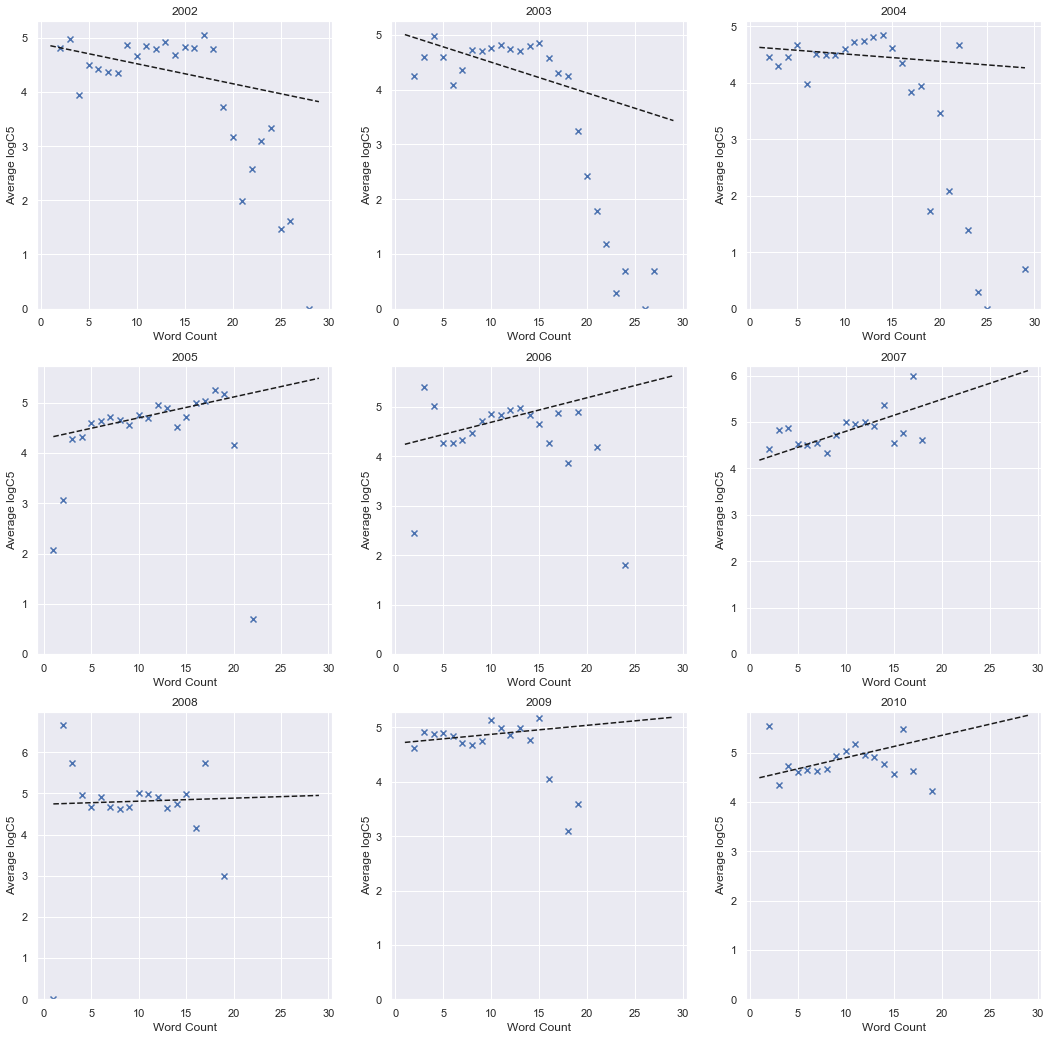

In [9]:
X_years = [x02, x03, x04, x05, x06, x07, x08, x09, x10]
y_years = [y02, y03, y04, y05, y06, y07, y08, y09, y10] 



# Average character, word and cleaned title word counts over the years
f1 = plt.figure(figsize=(18,18))
ax1 = f1.add_subplot(331)
x02_for_fit = x02
x02_for_fit = sm.add_constant(x02_for_fit)
mod_wls = sm.WLS(np.array(y02), np.array(x02_for_fit), weights=(w02))
res_wls = mod_wls.fit()
intercept, slope = res_wls.params
axes = plt.gca()
x_vals = np.array(list(range(1,30)))
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', color="k")
ax1.scatter(x02, 
            y02, 
            marker='x')
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Average logC5")
ax1.set_title("2002")



ax1 = f1.add_subplot(332)
x03_for_fit = x03
x03_for_fit = sm.add_constant(x03_for_fit)
mod_wls = sm.WLS(np.array(y03), np.array(x03_for_fit), weights=(w03))
res_wls = mod_wls.fit()
intercept, slope = res_wls.params
axes = plt.gca()
x_vals = np.array(list(range(1,30)))
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', color="k")
ax1.scatter(x03, 
            y03, 
            marker='x')
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Average logC5")
ax1.set_title("2003")



ax1 = f1.add_subplot(333)
x04_for_fit = x04
x04_for_fit = sm.add_constant(x04_for_fit)
mod_wls = sm.WLS(np.array(y04), np.array(x04_for_fit), weights=(w04))
res_wls = mod_wls.fit()
intercept, slope = res_wls.params
axes = plt.gca()
x_vals = np.array(list(range(1,30)))
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', color="k")
ax1.scatter(x04, 
            y04, 
            marker='x')
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Average logC5")
ax1.set_title("2004")


ax1 = f1.add_subplot(334)
x05_for_fit = x05
x05_for_fit = sm.add_constant(x05_for_fit)
mod_wls = sm.WLS(np.array(y05), np.array(x05_for_fit), weights=(w05))
res_wls = mod_wls.fit()
intercept, slope = res_wls.params
axes = plt.gca()
x_vals = np.array(list(range(1,30)))
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', color="k")
ax1.scatter(x05, 
            y05, 
            marker='x')
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Average logC5")
ax1.set_title("2005")


ax1 = f1.add_subplot(335)
x06_for_fit = x06
x06_for_fit = sm.add_constant(x06_for_fit)
mod_wls = sm.WLS(np.array(y06), np.array(x06_for_fit), weights=(w06))
res_wls = mod_wls.fit()
intercept, slope = res_wls.params
axes = plt.gca()
x_vals = np.array(list(range(1,30)))
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', color="k")
ax1.scatter(x06, 
            y06, 
            marker='x')
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Average logC5")
ax1.set_title("2006")



ax1 = f1.add_subplot(336)
x07_for_fit = x07
x07_for_fit = sm.add_constant(x07_for_fit)
mod_wls = sm.WLS(np.array(y07), np.array(x07_for_fit), weights=(w07))
res_wls = mod_wls.fit()
intercept, slope = res_wls.params
axes = plt.gca()
x_vals = np.array(list(range(1,30)))
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', color="k")
ax1.scatter(x07, 
            y07, 
            marker='x')
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Average logC5")
ax1.set_title("2007")


ax1 = f1.add_subplot(337)
x08_for_fit = x08
x08_for_fit = sm.add_constant(x08_for_fit)
mod_wls = sm.WLS(np.array(y08), np.array(x08_for_fit), weights=(w08))
res_wls = mod_wls.fit()
intercept, slope = res_wls.params
axes = plt.gca()
x_vals = np.array(list(range(1,30)))
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', color="k")
ax1.scatter(x08, 
            y08, 
            marker='x')
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Average logC5")
ax1.set_title("2008")



ax1 = f1.add_subplot(338)
x09_for_fit = x09
x09_for_fit = sm.add_constant(x09_for_fit)
mod_wls = sm.WLS(np.array(y09), np.array(x09_for_fit), weights=(w09))
res_wls = mod_wls.fit()
intercept, slope = res_wls.params
axes = plt.gca()
x_vals = np.array(list(range(1,30)))
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', color="k")
ax1.scatter(x09, 
            y09, 
            marker='x')
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Average logC5")
ax1.set_title("2009")



ax1 = f1.add_subplot(339)
x10_for_fit = x10
x10_for_fit = sm.add_constant(x10_for_fit)
mod_wls = sm.WLS(np.array(y10), np.array(x10_for_fit), weights=(w10))
res_wls = mod_wls.fit()
intercept, slope = res_wls.params
axes = plt.gca()
x_vals = np.array(list(range(1,30)))
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', color="k")
ax1.scatter(x10, 
            y10, 
            marker='x')
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Average logC5")
ax1.set_title("2010")

In [10]:

def get_grouped_data_for_year(year):
    tmp = data[data.PubYear_x == year]
    tmp = tmp.groupby('word_count')['c5'].agg(['median','count'])
    tmp = tmp.rename(columns={'median':'avg_c5', 'count':'weight'}).reset_index()
    tmp['median_log_c5'] = tmp['avg_c5'].apply(lambda x: np.log(x+1))
    return tmp
    
grouped_medians = [get_grouped_data_for_year(year) for year in range(2002, 2011)]

In [11]:
x02 = list(grouped_medians[0]["word_count"])
y02 = list(grouped_medians[0]["median_log_c5"])
w02 = np.array(list(grouped_medians[0]["weight"]))

x03 = list(grouped_medians[1]["word_count"])
y03 = list(grouped_medians[1]["median_log_c5"])
w03 = np.array(list(grouped_medians[1]["weight"]))


x04 = list(grouped_medians[2]["word_count"])
y04 = list(grouped_medians[2]["median_log_c5"])
w04 = np.array(list(grouped_medians[2]["weight"]))


x05 = list(grouped_medians[3]["word_count"])
y05 = list(grouped_medians[3]["median_log_c5"])
w05 = np.array(list(grouped_medians[3]["weight"]))


x06 = list(grouped_medians[4]["word_count"])
y06 = list(grouped_medians[4]["median_log_c5"])
w06 = np.array(list(grouped_medians[4]["weight"]))


x07 = list(grouped_medians[5]["word_count"])
y07 = list(grouped_medians[5]["median_log_c5"])
w07 = np.array(list(grouped_medians[5]["weight"]))


x08 = list(grouped_medians[6]["word_count"])
y08 = list(grouped_medians[6]["median_log_c5"])
w08 = np.array(list(grouped_medians[6]["weight"]))


x09 = list(grouped_medians[7]["word_count"])
y09 = list(grouped_medians[7]["median_log_c5"])
w09 = np.array(list(grouped_medians[7]["weight"]))


x10 = list(grouped_medians[8]["word_count"])
y10 = list(grouped_medians[8]["median_log_c5"])
w10 = np.array(list(grouped_medians[8]["weight"]))


Text(0.5,1,'2010')

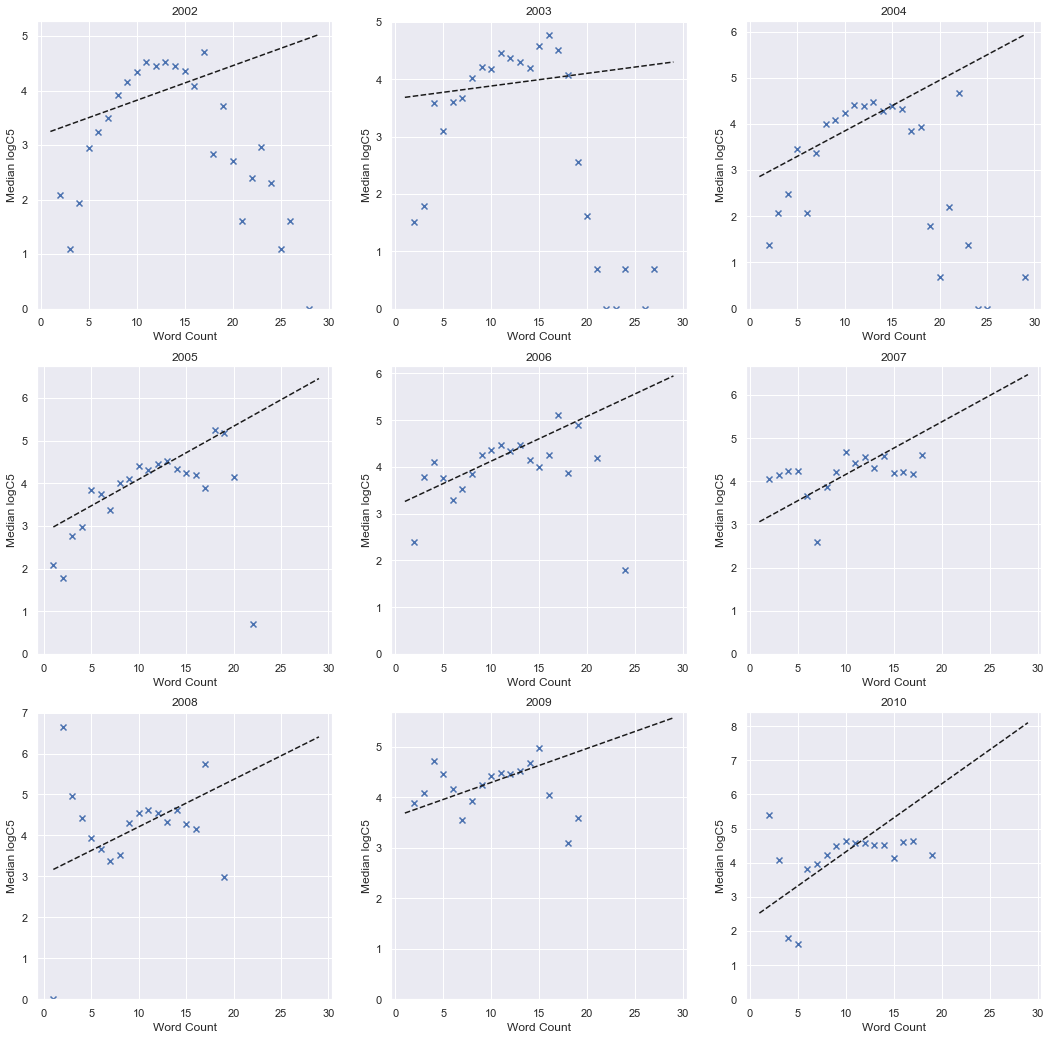

In [12]:
# Median character, word and cleaned title word counts over the years
f1 = plt.figure(figsize=(18,18))
ax1 = f1.add_subplot(331)
x02_for_fit = x02
x02_for_fit = sm.add_constant(x02_for_fit)
mod_wls = sm.WLS(np.array(y02), np.array(x02_for_fit), weights=(w02))
res_wls = mod_wls.fit()
intercept, slope = res_wls.params
axes = plt.gca()
x_vals = np.array(list(range(1,30)))
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', color="k")
ax1.scatter(x02, 
            y02, 
            marker='x')
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Median logC5")
ax1.set_title("2002")



ax1 = f1.add_subplot(332)
x03_for_fit = x03
x03_for_fit = sm.add_constant(x03_for_fit)
mod_wls = sm.WLS(np.array(y03), np.array(x03_for_fit), weights=(w03))
res_wls = mod_wls.fit()
intercept, slope = res_wls.params
axes = plt.gca()
x_vals = np.array(list(range(1,30)))
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', color="k")
ax1.scatter(x03, 
            y03, 
            marker='x')
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Median logC5")
ax1.set_title("2003")



ax1 = f1.add_subplot(333)
x04_for_fit = x04
x04_for_fit = sm.add_constant(x04_for_fit)
mod_wls = sm.WLS(np.array(y04), np.array(x04_for_fit), weights=(w04))
res_wls = mod_wls.fit()
intercept, slope = res_wls.params
axes = plt.gca()
x_vals = np.array(list(range(1,30)))
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', color="k")
ax1.scatter(x04, 
            y04, 
            marker='x')
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Median logC5")
ax1.set_title("2004")


ax1 = f1.add_subplot(334)
x05_for_fit = x05
x05_for_fit = sm.add_constant(x05_for_fit)
mod_wls = sm.WLS(np.array(y05), np.array(x05_for_fit), weights=(w05))
res_wls = mod_wls.fit()
intercept, slope = res_wls.params
axes = plt.gca()
x_vals = np.array(list(range(1,30)))
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', color="k")
ax1.scatter(x05, 
            y05, 
            marker='x')
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Median logC5")
ax1.set_title("2005")


ax1 = f1.add_subplot(335)
x06_for_fit = x06
x06_for_fit = sm.add_constant(x06_for_fit)
mod_wls = sm.WLS(np.array(y06), np.array(x06_for_fit), weights=(w06))
res_wls = mod_wls.fit()
intercept, slope = res_wls.params
axes = plt.gca()
x_vals = np.array(list(range(1,30)))
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', color="k")
ax1.scatter(x06, 
            y06, 
            marker='x')
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Median logC5")
ax1.set_title("2006")



ax1 = f1.add_subplot(336)
x07_for_fit = x07
x07_for_fit = sm.add_constant(x07_for_fit)
mod_wls = sm.WLS(np.array(y07), np.array(x07_for_fit), weights=(w07))
res_wls = mod_wls.fit()
intercept, slope = res_wls.params
axes = plt.gca()
x_vals = np.array(list(range(1,30)))
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', color="k")
ax1.scatter(x07, 
            y07, 
            marker='x')
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Median logC5")
ax1.set_title("2007")


ax1 = f1.add_subplot(337)
x08_for_fit = x08
x08_for_fit = sm.add_constant(x08_for_fit)
mod_wls = sm.WLS(np.array(y08), np.array(x08_for_fit), weights=(w08))
res_wls = mod_wls.fit()
intercept, slope = res_wls.params
axes = plt.gca()
x_vals = np.array(list(range(1,30)))
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', color="k")
ax1.scatter(x08, 
            y08, 
            marker='x')
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Median logC5")
ax1.set_title("2008")



ax1 = f1.add_subplot(338)
x09_for_fit = x09
x09_for_fit = sm.add_constant(x09_for_fit)
mod_wls = sm.WLS(np.array(y09), np.array(x09_for_fit), weights=(w09))
res_wls = mod_wls.fit()
intercept, slope = res_wls.params
axes = plt.gca()
x_vals = np.array(list(range(1,30)))
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', color="k")
ax1.scatter(x09, 
            y09, 
            marker='x')
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Median logC5")
ax1.set_title("2009")



ax1 = f1.add_subplot(339)
x10_for_fit = x10
x10_for_fit = sm.add_constant(x10_for_fit)
mod_wls = sm.WLS(np.array(y10), np.array(x10_for_fit), weights=(w10))
res_wls = mod_wls.fit()
intercept, slope = res_wls.params
axes = plt.gca()
x_vals = np.array(list(range(1,30)))
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', color="k")
ax1.scatter(x10, 
            y10, 
            marker='x')
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Median logC5")
ax1.set_title("2010")

__Fit to any quartile__

In [36]:
# What is the variation of log citation counts over a period of 9 years -> from 2002 - 2010  with the variation in 
# word count
# Average character, word and cleaned title word counts over the years


def get_grouped_data_for_year(year):
    _data = data[data.PubYear_x == year]
    
    tmp = _data.groupby('word_count')['c5'].quantile(.6).reset_index(name="quartile_c5")
    tmp['quartile_log_c5'] = tmp['quartile_c5'].apply(lambda x: np.log(x+1))
    
    #print(tmp.columns)
    
    tmp1 = _data[["word_count"]].groupby('word_count').size().reset_index(name="weight")
    tmp = tmp.merge(tmp1, how='inner', on="word_count")
    
    return tmp
    
grouped_quartiles = [get_grouped_data_for_year(year) for year in range(2002, 2011)]

In [37]:
x02 = list(grouped_quartiles[0]["word_count"])
y02 = list(grouped_quartiles[0]["quartile_log_c5"])
w02 = np.array(list(grouped_quartiles[0]["weight"]))

x03 = list(grouped_quartiles[1]["word_count"])
y03 = list(grouped_quartiles[1]["quartile_log_c5"])
w03 = np.array(list(grouped_quartiles[1]["weight"]))


x04 = list(grouped_quartiles[2]["word_count"])
y04 = list(grouped_quartiles[2]["quartile_log_c5"])
w04 = np.array(list(grouped_quartiles[2]["weight"]))


x05 = list(grouped_quartiles[3]["word_count"])
y05 = list(grouped_quartiles[3]["quartile_log_c5"])
w05 = np.array(list(grouped_quartiles[3]["weight"]))


x06 = list(grouped_quartiles[4]["word_count"])
y06 = list(grouped_quartiles[4]["quartile_log_c5"])
w06 = np.array(list(grouped_quartiles[4]["weight"]))


x07 = list(grouped_quartiles[5]["word_count"])
y07 = list(grouped_quartiles[5]["quartile_log_c5"])
w07 = np.array(list(grouped_quartiles[5]["weight"]))


x08 = list(grouped_quartiles[6]["word_count"])
y08 = list(grouped_quartiles[6]["quartile_log_c5"])
w08 = np.array(list(grouped_quartiles[6]["weight"]))


x09 = list(grouped_quartiles[7]["word_count"])
y09 = list(grouped_quartiles[7]["quartile_log_c5"])
w09 = np.array(list(grouped_quartiles[7]["weight"]))


x10 = list(grouped_quartiles[8]["word_count"])
y10 = list(grouped_quartiles[8]["quartile_log_c5"])
w10 = np.array(list(grouped_quartiles[8]["weight"]))



Text(0.5,1,'2010')

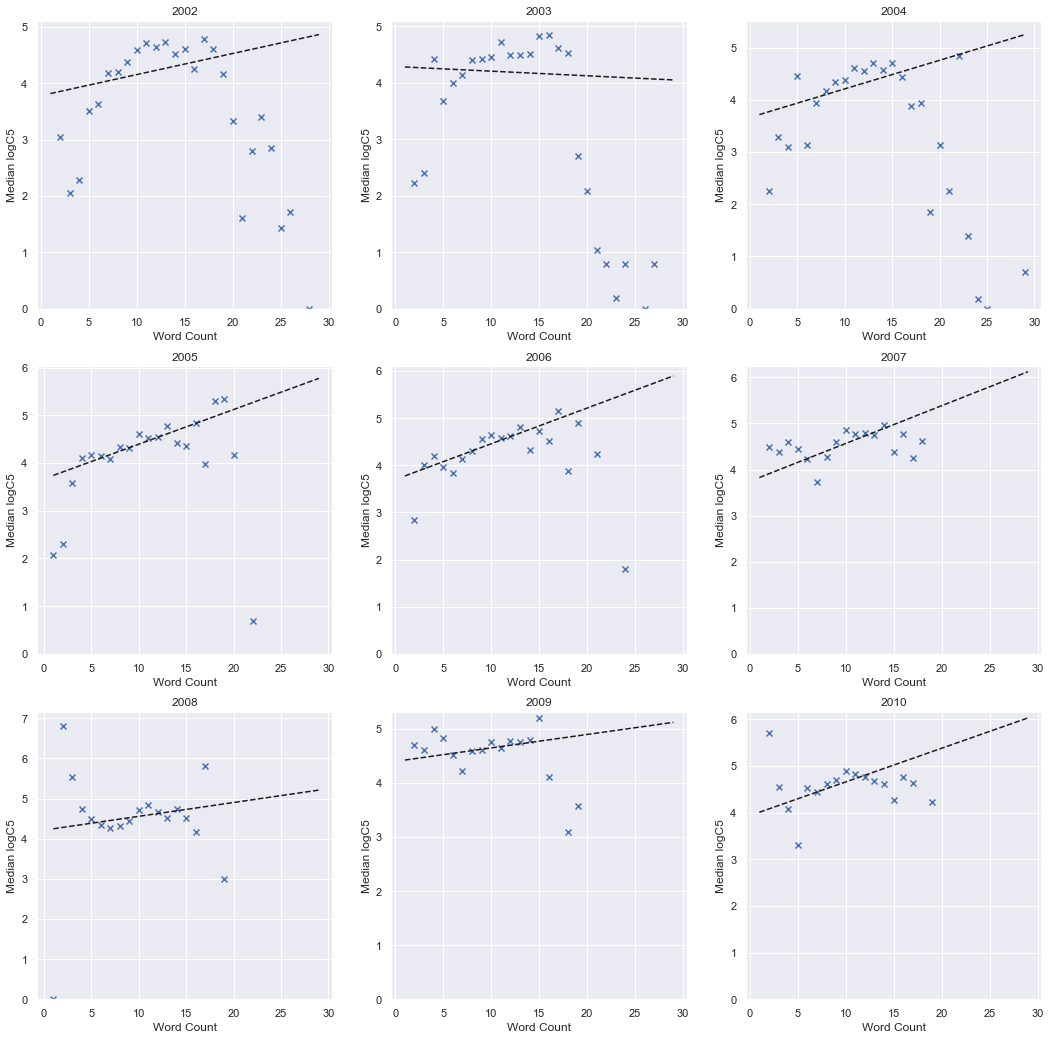

In [38]:
# Median character, word and cleaned title word counts over the years
f1 = plt.figure(figsize=(18,18))
ax1 = f1.add_subplot(331)
x02_for_fit = x02
x02_for_fit = sm.add_constant(x02_for_fit)
mod_wls = sm.WLS(np.array(y02), np.array(x02_for_fit), weights=(w02))
res_wls = mod_wls.fit()
intercept, slope = res_wls.params
axes = plt.gca()
x_vals = np.array(list(range(1,30)))
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', color="k")
ax1.scatter(x02, 
            y02, 
            marker='x')
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Median logC5")
ax1.set_title("2002")



ax1 = f1.add_subplot(332)
x03_for_fit = x03
x03_for_fit = sm.add_constant(x03_for_fit)
mod_wls = sm.WLS(np.array(y03), np.array(x03_for_fit), weights=(w03))
res_wls = mod_wls.fit()
intercept, slope = res_wls.params
axes = plt.gca()
x_vals = np.array(list(range(1,30)))
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', color="k")
ax1.scatter(x03, 
            y03, 
            marker='x')
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Median logC5")
ax1.set_title("2003")



ax1 = f1.add_subplot(333)
x04_for_fit = x04
x04_for_fit = sm.add_constant(x04_for_fit)
mod_wls = sm.WLS(np.array(y04), np.array(x04_for_fit), weights=(w04))
res_wls = mod_wls.fit()
intercept, slope = res_wls.params
axes = plt.gca()
x_vals = np.array(list(range(1,30)))
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', color="k")
ax1.scatter(x04, 
            y04, 
            marker='x')
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Median logC5")
ax1.set_title("2004")


ax1 = f1.add_subplot(334)
x05_for_fit = x05
x05_for_fit = sm.add_constant(x05_for_fit)
mod_wls = sm.WLS(np.array(y05), np.array(x05_for_fit), weights=(w05))
res_wls = mod_wls.fit()
intercept, slope = res_wls.params
axes = plt.gca()
x_vals = np.array(list(range(1,30)))
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', color="k")
ax1.scatter(x05, 
            y05, 
            marker='x')
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Median logC5")
ax1.set_title("2005")


ax1 = f1.add_subplot(335)
x06_for_fit = x06
x06_for_fit = sm.add_constant(x06_for_fit)
mod_wls = sm.WLS(np.array(y06), np.array(x06_for_fit), weights=(w06))
res_wls = mod_wls.fit()
intercept, slope = res_wls.params
axes = plt.gca()
x_vals = np.array(list(range(1,30)))
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', color="k")
ax1.scatter(x06, 
            y06, 
            marker='x')
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Median logC5")
ax1.set_title("2006")



ax1 = f1.add_subplot(336)
x07_for_fit = x07
x07_for_fit = sm.add_constant(x07_for_fit)
mod_wls = sm.WLS(np.array(y07), np.array(x07_for_fit), weights=(w07))
res_wls = mod_wls.fit()
intercept, slope = res_wls.params
axes = plt.gca()
x_vals = np.array(list(range(1,30)))
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', color="k")
ax1.scatter(x07, 
            y07, 
            marker='x')
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Median logC5")
ax1.set_title("2007")


ax1 = f1.add_subplot(337)
x08_for_fit = x08
x08_for_fit = sm.add_constant(x08_for_fit)
mod_wls = sm.WLS(np.array(y08), np.array(x08_for_fit), weights=(w08))
res_wls = mod_wls.fit()
intercept, slope = res_wls.params
axes = plt.gca()
x_vals = np.array(list(range(1,30)))
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', color="k")
ax1.scatter(x08, 
            y08, 
            marker='x')
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Median logC5")
ax1.set_title("2008")



ax1 = f1.add_subplot(338)
x09_for_fit = x09
x09_for_fit = sm.add_constant(x09_for_fit)
mod_wls = sm.WLS(np.array(y09), np.array(x09_for_fit), weights=(w09))
res_wls = mod_wls.fit()
intercept, slope = res_wls.params
axes = plt.gca()
x_vals = np.array(list(range(1,30)))
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', color="k")
ax1.scatter(x09, 
            y09, 
            marker='x')
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Median logC5")
ax1.set_title("2009")



ax1 = f1.add_subplot(339)
x10_for_fit = x10
x10_for_fit = sm.add_constant(x10_for_fit)
mod_wls = sm.WLS(np.array(y10), np.array(x10_for_fit), weights=(w10))
res_wls = mod_wls.fit()
intercept, slope = res_wls.params
axes = plt.gca()
x_vals = np.array(list(range(1,30)))
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', color="k")
ax1.scatter(x10, 
            y10, 
            marker='x')
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Word Count")
ax1.set_ylabel("Median logC5")
ax1.set_title("2010")